In [1]:
from __future__ import division, print_function, absolute_import 

import matplotlib.pyplot as plt
%matplotlib inline
# import matplotlib.ticker
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.font_manager import FontProperties
import palettable
import numpy as np
import astropy.io.ascii as at
import astropy.io.fits as fits
import astropy.table as table
import astropy.units as u
from astropy.coordinates import SkyCoord

In [2]:
from hypra.utils import cat_io
pdat,_,_,_ = cat_io.get_data("P")
hdat,_,_,_ = cat_io.get_data("H")

p_pos = SkyCoord(pdat["RA"],pdat["DEC"],unit=u.deg,frame="icrs")
h_pos = SkyCoord(hdat["RA"],hdat["DEC"],unit=u.deg,frame="icrs")

# A few definitions

In [3]:
poster_figure = (12,7)
talk_figure = (10,6.5)
single_figure = (8,8)
double_figure = (13,6)
double_stacked = (6,13)
triple_stacked = (6,14)
quad_square = (13,10)
proposal_figure = (10,5.5)

In [4]:
import matplotlib as mpl
mpl.rcParams['lines.markeredgewidth'] = 1.5
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['legend.fontsize'] = 16
# mpl.rcParams[''] = 


# mpl.rcParams['axes.prop_cycle'] = cycler('color',cmap_qual)

In [5]:
# cmap = plt.cm.viridis
# old_color = plt.cm.Greys(0.5)
# k2_color = "Crimson"

cmap = colors.ListedColormap(palettable.colorbrewer.qualitative.Dark2_6.mpl_colors)
cmap_qual = palettable.colorbrewer.qualitative.Dark2_6.mpl_colors
old_color = plt.cm.Greys(0.4)
k2_color = palettable.colorbrewer.qualitative.Dark2_6.mpl_colors[4]
matt_color = cmap_qual[3]
brown_color = cmap_qual[2]


In [6]:
ecliptic = SkyCoord(np.linspace(0,360,1000),np.zeros(1000),unit=u.deg,frame="barycentrictrueecliptic")

In [7]:
# ecliptic.

# Show Praesepe and Hyades in cluster space

In [8]:
webda = at.read("webdaclusters.csv")
print(webda.dtype)
# NGC 2632 and Melotte 25

webda["Dist"][webda["Cluster_name"]=="Ruprecht 147"] = 300

webda_pos = SkyCoord(webda["RA"],webda["Dec"],unit=(u.hourangle,u.deg),frame="icrs")
# print(webda_pos)

[('Cluster_name', 'S15'), ('RA', 'S8'), ('Dec', 'S9'), ('l', '<f8'), ('b', '<f8'), ('Dist', '<i8'), ('Mod', '<f8'), ('EB-V', '<f8'), ('Age', '<f8'), ('ST', 'S2'), ('Z', '<f8'), ('Diam', '<f8'), ('Fe/H', '<f8'), ('MRV', '<f8'), ('pm RA', '<f8'), ('pm Dec', '<f8'), ('Measures', '<i8'), ('Stars', '<i8')]


In [57]:
khar0 = at.read("kharchenko2013_clusters.csv",delimiter=",",data_start=1,header_start=0)
# NGC_2632, Hyades isn't in there (too close to appear as an overdensity)
print(khar0.dtype)

ocs = khar0["Type"].mask.nonzero()[0]
print(ocs)
khar0 = khar0[ocs]

khar_z0 = np.sin(khar0["GLAT"] * np.pi / 180) * khar0["d"]
# print(khar_z)

khar_pos0 = SkyCoord(khar0["RAJ2000"],khar0["DEJ2000"],unit=u.deg,frame="icrs")

res = khar_pos0.match_to_catalog_sky(webda_pos)

[('MWSC', '<i8'), ('Name', 'S17'), ('Type', 'S7'), ('n_Type', 'S1'), ('RAJ2000', '<f8'), ('DEJ2000', '<f8'), ('GLON', '<f8'), ('GLAT', '<f8'), ('r0', '<f8'), ('r1', '<f8'), ('r2', '<f8'), ('pmRA', '<f8'), ('pmDE', '<f8'), ('RV', '<f8'), ('e_RV', '<f8'), ('o_RV', '<i8'), ('N1sr0', '<i8'), ('N1sr1', '<i8'), ('N1sr2', '<i8'), ('d', '<i8'), ('E(B-V)', '<f8'), ('MOD', '<f8'), ('E(J-Ks)', '<f8'), ('E(J-H)', '<f8'), ('dH', '<f8'), ('logt', '<f8'), ('e_logt', '<f8'), ('Nt', '<i8'), ('SType', 'S3'), ('[Fe/H]', 'S6'), ('e_[Fe/H]', '<f8'), ('o_[Fe/H]', '<i8'), ('Simbad', 'S6'), ('col33', 'S6')]
[   0    1    2 ..., 3003 3004 3005]


In [58]:
print(res)
sep2d = np.asarray(res[1].value)*res[1].unit
print(sep2d)
print(res[0],res[0][0])

(array([2, 4, 3, ..., 3, 2, 0]), <Angle [ 2.06431023, 5.77318436, 1.37988289,...,  2.10876175, 2.34326497,
         1.31806016] deg>, <Quantity [ 0.03602706, 0.10071846, 0.02408292,...,  0.03680276,
            0.04089484, 0.02300398]>)
[ 2.06431023  5.77318436  1.37988289 ...,  2.10876175  2.34326497
  1.31806016] deg
[2 4 3 ..., 3 2 0] 2


In [59]:
names_match = np.zeros(len(khar0),bool)
for i,j in enumerate(res[0]):
    if khar0["Name"][i]==webda["Cluster_name"][j].replace(" ","_"):
        names_match[i] = True
print(max(sep2d[names_match]),len(np.where(names_match)[0]))

0.796743917537 deg 518


(array([ 518.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Patch objects>)

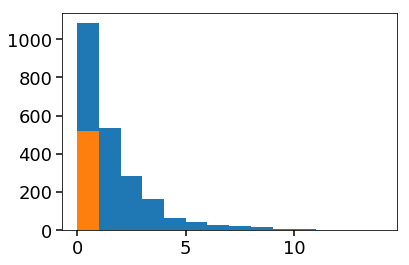

In [60]:
plt.hist(sep2d,bins=np.arange(15))
plt.hist(sep2d[names_match],bins=np.arange(15))

In [61]:
new_khar = sep2d > (0.8*u.deg)
khar = khar0[new_khar]
khar_z = khar_z0[new_khar]
khar_pos = khar_pos0[new_khar]

In [53]:
schm = at.read("schmeja2014_clusters.csv",delimiter=",",data_start=1,header_start=0)
print(schm.dtype)

schm_z = np.sin(schm["GLAT"] * np.pi / 180) * schm["d"]
schm_pos = SkyCoord(schm["RAJ2000"],schm["DEJ2000"],unit=u.deg,frame="icrs")

# All Schm clusters are >2 degrees from any Webda clusters

[('MWSC', '<i8'), ('N', '<i8'), ('Name', 'S9'), ('Type', 'S1'), ('n_Type', 'S1'), ('RAJ2000', '<f8'), ('DEJ2000', '<f8'), ('GLON', '<f8'), ('GLAT', '<f8'), ('r0', '<f8'), ('r1', '<f8'), ('r2', '<f8'), ('pmRA', '<f8'), ('pmDE', '<f8'), ('N1sr0', '<i8'), ('N1sr1', '<i8'), ('N1sr2', '<i8'), ('d', '<i8'), ('E(B-V)', '<f8'), ('MOD', '<f8'), ('E(J-Ks)', '<f8'), ('E(J-H)', '<f8'), ('deltaH', '<f8'), ('logt', '<f8'), ('e_logt', '<f8'), ('Nt', '<i8')]


In [54]:
prae = webda["Dist"][webda["Cluster_name"]=="NGC 2632"],10**webda["Age"][webda["Cluster_name"]=="NGC 2632"]
hya = webda["Dist"][webda["Cluster_name"]=="Melotte 25"],10**webda["Age"][webda["Cluster_name"]=="Melotte 25"]
print(np.asarray(prae),np.asarray(hya))

[[  1.87000000e+02]
 [  7.29457510e+08]] [[  4.50000000e+01]
 [  7.87045790e+08]]


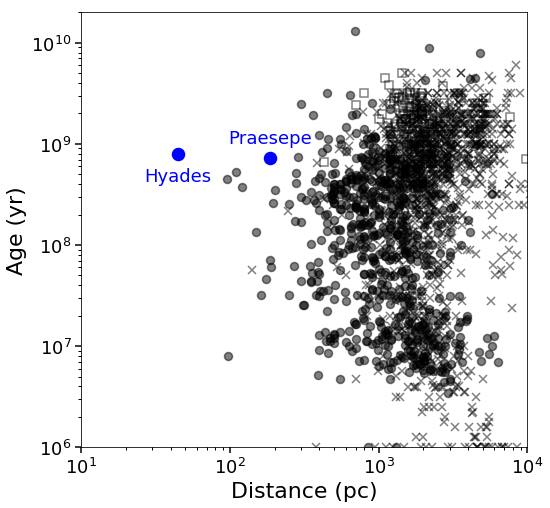

In [62]:
plt.figure(figsize=single_figure)
ax = plt.subplot(111)

ax.plot(khar["d"],10**khar["logt"],'kx',alpha=0.5)
ax.plot(schm["d"],10**schm["logt"],'ks',mfc="none",alpha=0.5)
ax.plot(webda["Dist"],10**webda["Age"],'ko',alpha=0.5)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim(10,1e4)
ax.set_ylim(1e6,2e10)

ax.set_xlabel("Distance (pc)")
ax.set_ylabel("Age (yr)")

plt.savefig("all_clusters_age_dist.png",bbox_inches="tight",dpi=300)
            
ax.plot(prae[0],prae[1],'o',mfc="b",mec="b",ms=12)# label="Praesepe")
ax.plot(hya[0],hya[1],'o',mfc="b",mec="b",ms=12)# label="Hyades")

ax.text(hya[0],hya[1]*0.55,"Hyades",color="b",horizontalalignment="center",fontsize=18)
ax.text(prae[0],prae[1]*1.4,"Praesepe",color="b",horizontalalignment="center",fontsize=18)


plt.savefig("all_clusters_age_dist_hypra.png",bbox_inches="tight",dpi=300)


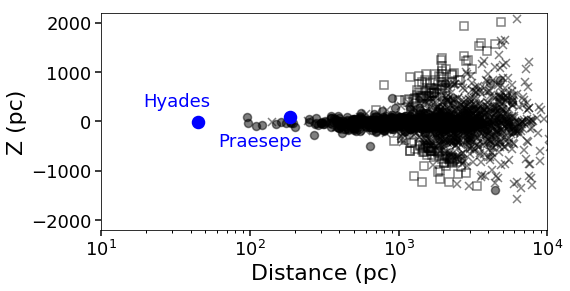

In [63]:
plt.figure(figsize=(8,4))
ax2 = plt.subplot(111)

ax2.plot(khar["d"],khar_z,'kx',alpha=0.5)
ax2.plot(webda["Dist"],webda["Z"],'ko',alpha=0.5)
ax2.plot(schm["d"],schm_z,'ks',mfc="none",alpha=0.5)

ax2.set_xscale("log")
ax2.set_xlim(10,1e4)
ax2.set_ylim(-2.2e3,2.2e3)

ax2.set_xlabel("Distance (pc)")
ax2.set_ylabel("Z (pc)")

plt.savefig("all_clusters_age_Z.png",bbox_inches="tight",dpi=300)
            
ax2.plot(webda["Dist"][webda["Cluster_name"]=="NGC 2632"],webda["Z"][webda["Cluster_name"]=="NGC 2632"],
        'o',mfc="b",mec="b",ms=12)
ax2.plot(webda["Dist"][webda["Cluster_name"]=="Melotte 25"],webda["Z"][webda["Cluster_name"]=="Melotte 25"],
        'o',mfc="b",mec="b",ms=12)

ax2.text(hya[0]*1.2,300,"Hyades",color="b",horizontalalignment="right",fontsize=18)
ax2.text(prae[0]*1.2,-500,"Praesepe",color="b",horizontalalignment="right",fontsize=18)


# ax.text(hya[0],hya[1]*0.55,"Hyades",color="b",horizontalalignment="center",fontsize=18)
# ax.text(prae[0],prae[1]*1.4,"Praesepe",color="b",horizontalalignment="center",fontsize=18)


plt.savefig("all_clusters_age_Z_hypra.png",bbox_inches="tight",dpi=300)


In [64]:
print(webda["Stars"][np.argmin(webda["Dist"])])

594


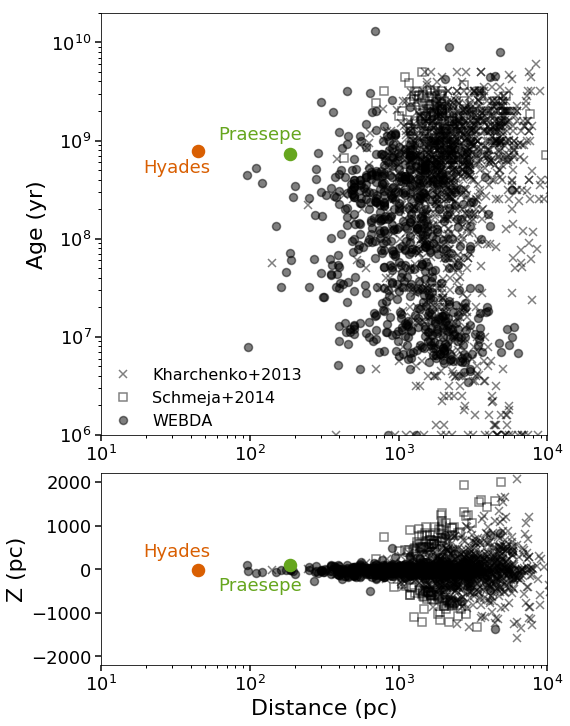

In [65]:
plt.figure(figsize=(8,12))
ax1 = plt.subplot2grid((3,1),(0,0),rowspan=2)

ax1.plot(khar["d"],10**khar["logt"],'kx',alpha=0.5,label="Kharchenko+2013")
ax1.plot(schm["d"],10**schm["logt"],'ks',mfc="none",alpha=0.5,label="Schmeja+2014")
ax1.plot(webda["Dist"],10**webda["Age"],'ko',label="WEBDA",alpha=0.5)

# ax1.plot(khar["d"][khar["Name"]=="NGC_2632"],10**khar["logt"][khar["Name"]=="NGC_2632"],'x',
#         color=cmap_qual[4],mew=2,ms=12)
prae = webda["Dist"][webda["Cluster_name"]=="NGC 2632"],10**webda["Age"][webda["Cluster_name"]=="NGC 2632"]
hya = webda["Dist"][webda["Cluster_name"]=="Melotte 25"],10**webda["Age"][webda["Cluster_name"]=="Melotte 25"]
ax1.plot(prae[0],prae[1],'o',mfc=cmap_qual[4],mec=cmap_qual[4],ms=12)# label="Praesepe")
ax1.plot(hya[0],hya[1],'o',mfc=cmap_qual[1],mec=cmap_qual[1],ms=12)# label="Hyades")

ax1.text(hya[0]*1.2,hya[1]*0.6,"Hyades",color=cmap_qual[1],horizontalalignment="right",fontsize=18)
ax1.text(prae[0]*1.2,prae[1]*1.4,"Praesepe",color=cmap_qual[4],horizontalalignment="right",fontsize=18)

ax1.set_xscale("log")
ax1.set_yscale("log")

ax1.set_xlim(10,1e4)
ax1.set_ylim(1e6,2e10)

# ax1.set_xlabel("Distance (pc)")
ax1.set_ylabel("Age (yr)")

ax1.legend(loc=3,borderaxespad=0)

ax2 = plt.subplot2grid((3,1),(2,0),rowspan=1)

ax2.plot(khar["d"],khar_z,'kx',alpha=0.5)
ax2.plot(webda["Dist"],webda["Z"],'ko',alpha=0.5)
ax2.plot(schm["d"],schm_z,'ks',mfc="none",alpha=0.5)
ax2.plot(webda["Dist"][webda["Cluster_name"]=="NGC 2632"],webda["Z"][webda["Cluster_name"]=="NGC 2632"],
        'o',mfc=cmap_qual[4],mec=cmap_qual[4],ms=12)
ax2.plot(webda["Dist"][webda["Cluster_name"]=="Melotte 25"],webda["Z"][webda["Cluster_name"]=="Melotte 25"],
        'o',mfc=cmap_qual[1],mec=cmap_qual[1],ms=12)

ax2.text(hya[0]*1.2,300,"Hyades",color=cmap_qual[1],horizontalalignment="right",fontsize=18)
ax2.text(prae[0]*1.2,-500,"Praesepe",color=cmap_qual[4],horizontalalignment="right",fontsize=18)


ax2.set_xscale("log")
ax2.set_xlim(10,1e4)
ax2.set_ylim(-2.2e3,2.2e3)

ax2.set_xlabel("Distance (pc)")
ax2.set_ylabel("Z (pc)")

plt.savefig("all_clusters.pdf",bbox_inches="tight")
plt.savefig("all_clusters.png",bbox_inches="tight")

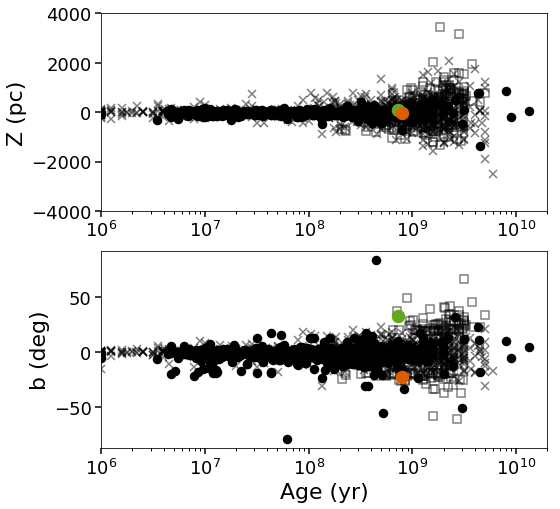

In [66]:
plt.figure(figsize=single_figure)
ax1 = plt.subplot(211)

ax1.plot(10**khar["logt"],khar_z,'kx',alpha=0.5)
ax1.plot(10**webda["Age"],webda["Z"],'ko')
ax1.plot(10**schm["logt"],schm_z,'ks',mfc="none",alpha=0.5,label="Schmeja+2014")
ax1.plot(10**webda["Age"][webda["Cluster_name"]=="NGC 2632"],webda["Z"][webda["Cluster_name"]=="NGC 2632"],
        'o',mfc=cmap_qual[4],mec=cmap_qual[4],ms=12)
ax1.plot(10**webda["Age"][webda["Cluster_name"]=="Melotte 25"],webda["Z"][webda["Cluster_name"]=="Melotte 25"],
        'o',mfc=cmap_qual[1],mec=cmap_qual[1],ms=12)

ax1.set_xscale("log")
ax1.set_xlim(1e6,2e10)
ax1.set_ylim(-4e3,4e3)

# ax1.set_xlabel("Distance (pc)")
ax1.set_ylabel("Z (pc)")


ax2 = plt.subplot(212)

ax2.plot(10**khar["logt"],khar["GLAT"],'kx',alpha=0.5)
ax2.plot(10**schm["logt"],schm["GLAT"],'ks',mfc="none",alpha=0.5,label="Schmeja+2014")
ax2.plot(10**webda["Age"],webda["b"],'ko')
ax2.plot(10**webda["Age"][webda["Cluster_name"]=="NGC 2632"],webda["b"][webda["Cluster_name"]=="NGC 2632"],
        'o',mfc=cmap_qual[4],mec=cmap_qual[4],ms=12)
ax2.plot(10**webda["Age"][webda["Cluster_name"]=="Melotte 25"],webda["b"][webda["Cluster_name"]=="Melotte 25"],
        'o',mfc=cmap_qual[1],mec=cmap_qual[1],ms=12)

ax2.set_xscale("log")
# ax.set_yscale("log")

ax2.set_xlim(1e6,2e10)

ax2.set_xlabel("Age (yr)")
ax2.set_ylabel("b (deg)")



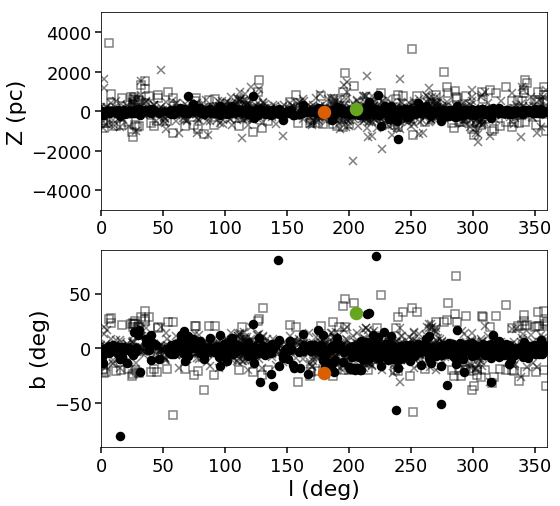

In [67]:
plt.figure(figsize=single_figure)
ax1 = plt.subplot(211)

ax1.plot(khar["GLON"],khar_z,'kx',alpha=0.5)
ax1.plot(webda["l"],webda["Z"],'ko')
ax1.plot(schm["GLON"],schm_z,'ks',mfc="none",alpha=0.5,label="Schmeja+2014")
ax1.plot(webda["l"][webda["Cluster_name"]=="NGC 2632"],webda["Z"][webda["Cluster_name"]=="NGC 2632"],
        'o',mfc=cmap_qual[4],mec=cmap_qual[4],ms=12)
ax1.plot(webda["l"][webda["Cluster_name"]=="Melotte 25"],webda["Z"][webda["Cluster_name"]=="Melotte 25"],
        'o',mfc=cmap_qual[1],mec=cmap_qual[1],ms=12)

# ax1.set_xscale("log")
ax1.set_xlim(0,360)
ax1.set_ylim(-5e3,5e3)

# ax1.set_xlabel("Distance (pc)")
ax1.set_ylabel("Z (pc)")


ax2 = plt.subplot(212,sharex=ax1)

ax2.plot(khar["GLON"],khar["GLAT"],'kx',alpha=0.5)
ax2.plot(schm["GLON"],schm["GLAT"],'ks',mfc="none",alpha=0.5,label="Schmeja+2014")
ax2.plot(webda["l"],webda["b"],'ko')
ax2.plot(webda["l"][webda["Cluster_name"]=="NGC 2632"],webda["b"][webda["Cluster_name"]=="NGC 2632"],
        'o',mfc=cmap_qual[4],mec=cmap_qual[4],ms=12)
ax2.plot(webda["l"][webda["Cluster_name"]=="Melotte 25"],webda["b"][webda["Cluster_name"]=="Melotte 25"],
        'o',mfc=cmap_qual[1],mec=cmap_qual[1],ms=12)

# ax2.set_xscale("log")
# ax.set_yscale("log")

ax2.set_ylim(-90,90)
ax2.set_xlim(0,360)

ax2.set_xlabel("l (deg)")
ax2.set_ylabel("b (deg)")



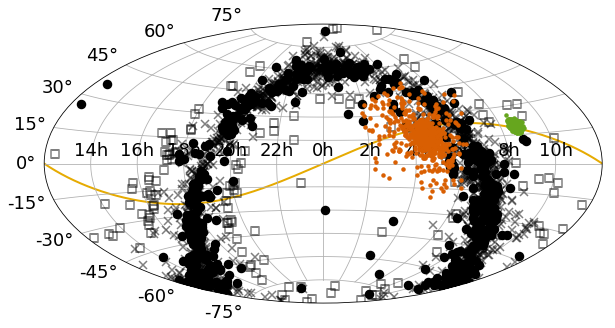

In [68]:
plt.figure(figsize=(10,8))
ax2 = plt.subplot(111, projection="aitoff")

ax2.plot(khar_pos.ra.wrap_at(180 * u.deg).radian,khar_pos.dec.radian,'kx',alpha=0.5,label="Kharchenko+2013")
ax2.plot(schm_pos.ra.wrap_at(180 * u.deg).radian,schm_pos.dec.radian,'ks',mfc="none",alpha=0.5,label="Schmeja+2014")
ax2.plot(webda_pos.ra.wrap_at(180 * u.deg).radian,webda_pos.dec.radian,'ko',label="WEBDA")

ax2.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax2.grid(True)

ax2.plot(p_pos.ra.wrap_at(180 * u.deg).radian,p_pos.dec.radian,
         'o',mfc=cmap_qual[4],mec=cmap_qual[4],ms=3,label="Praesepe")
ax2.plot(h_pos.ra.wrap_at(180 * u.deg).radian,h_pos.dec.radian,
         'o',mfc=cmap_qual[1],mec=cmap_qual[1],ms=3,label="Hyades")


ecliptic_ra = ecliptic.icrs.ra.wrap_at(180 * u.deg).radian
ecliptic_dec = ecliptic.icrs.dec.radian
new_ecl = np.argsort(ecliptic_ra)
ecliptic_ra = ecliptic_ra[new_ecl]
ecliptic_dec = ecliptic_dec[new_ecl]

ax2.plot(ecliptic_ra,ecliptic_dec,'-',color=cmap_qual[5],lw=2,zorder=-1)


# ax2.legend()

plt.savefig("all_clusters_equatorial.png",bbox_inches="tight")


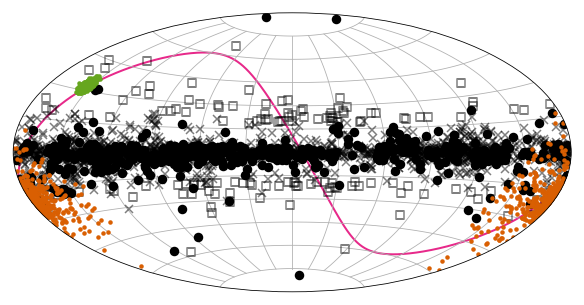

In [69]:
plt.figure(figsize=(10,8))
ax2 = plt.subplot(111, projection="aitoff")

ax2.plot(khar_pos.galactic.l.wrap_at(180 * u.deg).radian,khar_pos.galactic.b.radian,
         'kx',alpha=0.5,label="Kharchenko+2013")
ax2.plot(schm_pos.galactic.l.wrap_at(180 * u.deg).radian,schm_pos.galactic.b.radian,
         'ks',mfc="none",alpha=0.5,label="Schmeja+2014")
ax2.plot(webda_pos.galactic.l.wrap_at(180 * u.deg).radian,webda_pos.galactic.b.radian,
         'ko',label="WEBDA")

ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.grid(True)


ax2.plot(p_pos.galactic.l.wrap_at(180 * u.deg).radian,p_pos.galactic.b.radian,
         'o',mfc=cmap_qual[4],mec=cmap_qual[4],ms=3,label="Praesepe")
ax2.plot(h_pos.galactic.l.wrap_at(180 * u.deg).radian,h_pos.galactic.b.radian,
         'o',mfc=cmap_qual[1],mec=cmap_qual[1],ms=3,label="Hyades")

ecliptic_l = ecliptic.galactic.l.wrap_at(180 * u.deg).radian
ecliptic_b = ecliptic.galactic.b.radian
new_ecl = np.argsort(ecliptic_l)
ecliptic_l = ecliptic_l[new_ecl]
ecliptic_b = ecliptic_b[new_ecl]

ax2.plot(ecliptic_l,ecliptic_b,'-',color=cmap_qual[3],lw=2,zorder=-1)

# ax2.legend()

